In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

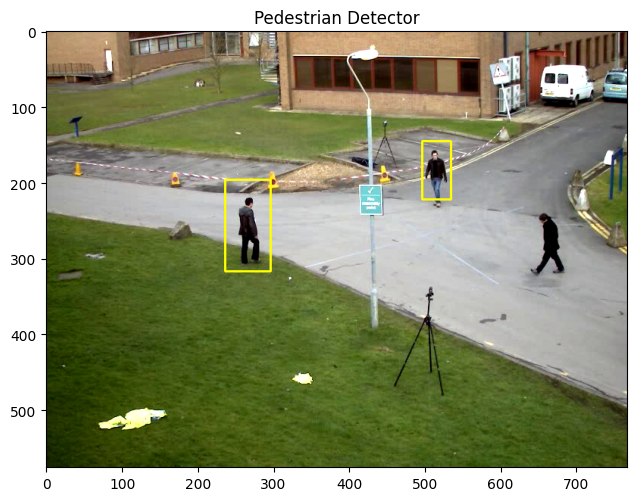

In [7]:
# Create our video capturing object
cap = cv2.VideoCapture('/content/pedestrians.avi')

# Load our body classifier
body_classifier = cv2.CascadeClassifier('/content/haarcascade_fullbody.xml')

# Read first frame
ret, frame = cap.read()

# Ret is True if successfully read
if ret:

  #Grayscale our image for faster processing
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  # Pass frame to our body classifier
  bodies = body_classifier.detectMultiScale(gray, 1.2, 3)

  # Extract bounding boxes for any bodies identified
  for (x,y,w,h) in bodies:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)

# Release our video capture
cap.release()
imshow("Pedestrian Detector", frame)

In [13]:
# detecting on the video

cap = cv2.VideoCapture('/content/pedestrians.avi')

# Get the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'walking_output.avi' file.
out = cv2.VideoWriter('walking_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

# define the classifer
pedestrian_classifier = cv2.CascadeClassifier('/content/haarcascade_fullbody.xml')

# loop once when video is succesfully loaded

while(True):

  ret, frame = cap.read()
  if ret:

    # covert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # pass frame to body classifier
    pedestrians = pedestrian_classifier.detectMultiScale(gray, 1.2, 3)

    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)

    # write the frame into output file
    out.write(frame)

  else:
    break

cap.release()
out.release()

In [14]:
!ffmpeg -i /content/walking_output.avi walking_output.mp4 -y

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [15]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('walking_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [16]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

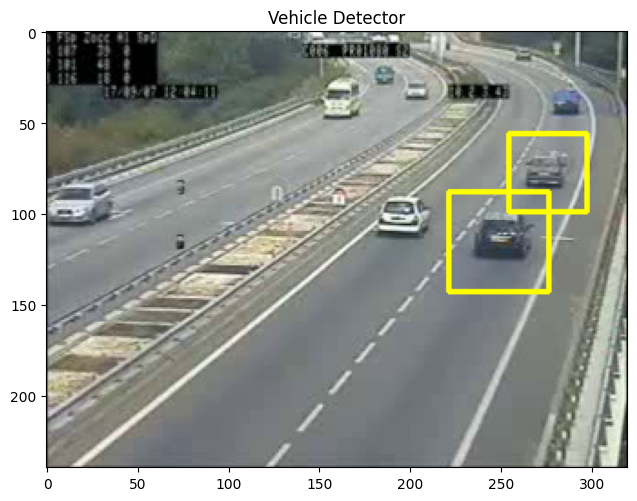

In [18]:
# vehicle detection using haarcascade

cap = cv2.VideoCapture('/content/car.avi')

# Load our body classifier
vehicle_classifier = cv2.CascadeClassifier('/content/haarcascade_car.xml')

#read first frame

ret, frame = cap.read()

if ret:

  # covert to gray scale
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  # pass frame to body classifier
  vehicles = vehicle_classifier.detectMultiScale(gray, 1.2, 3)

  # Extract bounding boxes for any bodies identified
  for (x,y,w,h) in vehicles:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)

# Release our video capture
cap.release()
imshow("Vehicle Detector", frame)

In [19]:
# vehicle detection on video clip

cap = cv2.VideoCapture('/content/car.avi')

# Get the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# create the codec and video writer
out = cv2.VideoWriter('vehicle_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

# define the classifer
vehicle_classifier = cv2.CascadeClassifier('/content/haarcascade_car.xml')

# loop once when video is succesfully loaded
while (True):

  ret, frame = cap.read()

  if ret:

    # covert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # pass frame to body classifier
    vehicles = vehicle_classifier.detectMultiScale(gray, 1.2, 3)

    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in vehicles:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)

    # write the frame into output file
    out.write(frame)

  else:
    break

cap.release()
out.release()

In [21]:
!ffmpeg -i /content/vehicle_output.avi vehicle_output.mp4 -y

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [23]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('vehicle_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [24]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)